# Capstone Project - NLP Chatbot

### DOMAIN: 
Industrial safety. NLP based Chatbot.

### CONTEXT:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

### DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

### Columns description:
* Data: timestamp or time/date information
* Countries: which country the accident occurred (anonymised)
* Local: the city where the manufacturing plant is located (anonymised)
* Industry sector: which sector the plant belongs to
* Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
* Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have   been (due to other factors involved in the accident)
* Gender: if the person is male of female
* Employee or Third Party: if the injured person is an employee or a third party
* Critical Risk: some description of the risk involved in the accident
* Description: Detailed description of how the accident happened.

Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing,
Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

### PROJECT OBJECTIVE:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Replace the folder path with your drive folder path and clone the githb repo

In [2]:
%cd /content/drive/MyDrive/AIML/Capstone

/content/drive/MyDrive/AIML/Capstone


Run the below code for clone the repo in our Googele drive for first time

In [3]:
! git clone https://github.com/shyamsparrow/Jan-G4---NLP-Chatbot.git

Cloning into 'Jan-G4---NLP-Chatbot'...
remote: Enumerating objects: 496, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 496 (delta 19), reused 0 (delta 0), pack-reused 452
Receiving objects: 100% (496/496), 113.95 MiB | 15.18 MiB/s, done.
Resolving deltas: 100% (252/252), done.
Checking out files: 100% (22/22), done.


Change the Current folder into Github repo main folder, all the functions we are calling has to be in this repo.

In [4]:
%cd /content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot

/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot


In [5]:
!git config --global user.email "pradeebha.ab@gmail.com"
!git config --global user.name "Pradeebha"

In [6]:
!git status


No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   AIML Capstone Project - NLP chatbot.pdf
	new file:   Capstone_NLP_Chatbot_Jan_A_G4.ipynb
	new file:   Chatbot.ipynb
	new file:   Data Set - industrial_safety_and_health_database_with_accidents_description.csv
	new file:   Models/LSTM_model.h5
	new file:   Models/LSTM_model.json
	new file:   Models/LSTM_model_weights.h5
	new file:   Models/interim_nn_Capstone_NLP_Chatbot_Jan_A_G4_24_11.ipynb
	new file:   Models/nn_base_model.h5
	new file:   NLP-ChatBot Interface- G4.docx
	new file:   NLP-ChatBot Interface- G4.pdf
	new file:   NLP_text_preprocess.py
	new file:   README.md
	new file:   Utilities/NLP_text_preprocess.py
	new file:   Utilities/config.py
	new file:   Utilities/parameters.pickle
	new file:   Utilities/result_df.csv
	new file:   config.py
	new file:   data/custom_substitutions.csv
	new file:   data/ignore_spellcheck_words.txt
	new file:   industry_df_preprocessed.csv
	new file

In [7]:
!git commit -m "My message"

fatal: cannot lock ref 'HEAD': Unable to create '/content/drive/My Drive/AIML/Capstone/Jan-G4---NLP-Chatbot/.git/refs/heads/main
r.lock': Invalid argument


Run this code to update the changes in repo to our drive

In [8]:
!git pull

You are not currently on a branch.
Please specify which branch you want to merge with.
See git-pull(1) for details.

    git pull <remote> <branch>



In [9]:
import warnings
warnings.filterwarnings('ignore')


import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import pickle



In [10]:
industry_df = pd.read_csv("/content/drive/MyDrive/AIML/Capstone/Jan-G4---NLP-Chatbot/industry_df_preprocessed.csv")

Model Building: Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(industry_df['Description_preprocessed'], industry_df['Potential_Accident_Level'].values, test_size=0.2, random_state=42)

In [12]:
print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 328
Validation utterances: 83


In [13]:
# Defining a function which quickly test the fit of 6 different models on the dataset
def ml_models(X_train , y_train, X_test, y_test):

    # creating a dictionary with different ML models
    models = {
        'LogReg': LogisticRegression(), 
        'Naive Bayes': GaussianNB(),        
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(), 
        'Decision Tree': DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5),          
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=7),
        'Bagging': BaggingClassifier(n_estimators=50, max_samples=.7),
        'AdaBoost': AdaBoostClassifier(n_estimators= 50),
        'Gradient Boost': GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05),
        'XGBoost': XGBClassifier()
    }
    
    names = []
    scores = []

    for name, model in models.items(): # Looping through each and every model
        clf = model.fit(X_train, y_train) # Fit the models one by one
        result = clf.score(X_test,y_test) 

        names.append(name)
        scores.append(result) # Appending the test scores to the list

        result_df =  pd.DataFrame({'model': names, 'accuracy': scores}) # Creating the dataframe using the model scores
      
    return result_df # Returns the dataframe

TF-IDF

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
# Initializing TfidfVectorizer object
tfIdfVectorizer = TfidfVectorizer()
X_train_tf = tfIdfVectorizer.fit_transform(X_train)
X_test_tf = tfIdfVectorizer.transform(X_test)

In [16]:
X_train_tf[1]

<1x2671 sparse matrix of type '<class 'numpy.float64'>'
	with 54 stored elements in Compressed Sparse Row format>

ML Classifiers

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [18]:
ml_models(X_train_tf.toarray(), y_train, X_test_tf.toarray(), y_test)

,model,accuracy
0,LogReg,0.373494
1,Naive Bayes,0.421687
2,KNN,0.361446
3,SVM,0.361446
4,Decision Tree,0.313253
5,RandomForest,0.361446
6,Bagging,0.373494
7,AdaBoost,0.349398
8,Gradient Boost,0.325301
9,XGBoost,0.313253


For TF-IDF vectorization, the accuracy is quite less. Though Logistic Regression performs better than the rest, The accuracy is not upto the mark. Next better accuracy comes with Naive Bayes clasifier

Using Bag of words

A bag-of-words is a representation of text that describes the occurrence of words within a document.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

ML Classifiers

In [21]:
ml_models(X_train_bow.toarray(), y_train, X_test_bow.toarray(), y_test)

,model,accuracy
0,LogReg,0.445783
1,Naive Bayes,0.409639
2,KNN,0.277108
3,SVM,0.385542
4,Decision Tree,0.349398
5,RandomForest,0.325301
6,Bagging,0.361446
7,AdaBoost,0.277108
8,Gradient Boost,0.337349
9,XGBoost,0.385542


The accuracy using BOW is more or less similar to those we got using TF-IDF

Hyperparameter Tuning:

In [22]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [24]:
def hyperparameterstune_model(name, model, X_train, y_train, param_grid):
    
    #start = time.time()  # note the start time 
    
    # Before starting with grid search we need to create a scoring function. This is accomplished using the make_scorer function of scikit-learn.
    # mll_scorer = metrics.make_scorer(multiclass_logloss, greater_is_better=False, needs_proba=True)

    # define grid search
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    if name == 'LGBMClassifier':
      grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, n_jobs=-1, cv=cv, 
                                        error_score=0)
    else:
      grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, 
                                  error_score=0)
      
    model_grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print("Best F1_Score: %f using %s" % (model_grid_result.best_score_, model_grid_result.best_params_))
    means = model_grid_result.cv_results_['mean_test_score']
    stds = model_grid_result.cv_results_['std_test_score']
    params = model_grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
      if param == model_grid_result.best_params_:
        print("%f (%f) with: %r" % (mean, stdev, param))
        print("95% Confidence interval range: ({0:.4f} %, {1:.4f} %)".format(mean-(2*stdev), mean+(2*stdev)))

    #end = time.time()  # note the end time
    #duration = end - start  # calculate the total duration
    #print("Total duration" , duration, "\n")
    
    return model_grid_result.best_estimator_

In [27]:
# define regressor models
models=[['LogisticRegression',LogisticRegression()],
    
    ['KNeighborsClassifier',KNeighborsClassifier()],
 
    ['RandomForestClassifier',RandomForestClassifier()],
    ['BaggingClassifier',BaggingClassifier()],
    
    ['AdaBoostClassifier',AdaBoostClassifier()],
    ['GradientBoostingClassifier',GradientBoostingClassifier()],
    
    ['XGBClassifier',XGBClassifier()]
]

# define model parameters

lr_param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                 'penalty': ['l2'],
                 #'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                 'C': [100, 10, 1.0, 0.1, 0.01]}
                 #'class_weight':['none','balanced'],
                 #'multi_class':['ovr', 'multinomial']}

knn_param_grid = {'n_neighbors': range(3, 21, 2),
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan', 'minkowski']}

rf_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_features': ['auto', 'sqrt', 'log2']}              
                 #'class_weight':['balanced','balanced_subsample','none']}
bag_param_grid = {'n_estimators': [10, 100, 1000],
                 'max_samples': np.arange(0.7, 0.8, 0.05)}

adb_param_grid = {'n_estimators': np.arange(30,100,10),
                 'learning_rate': np.arange(0.1,1,0.5)}
gb_param_grid = {'n_estimators': [10, 50, 100, 500],
                 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                 'subsample':[0.5, 0.7, 1.0],
                 'max_depth': [3, 7, 9]}

                
xgb_param_grid = {'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                  'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15],
                  'min_child_weight': [ 1, 3, 5, 7],
                  'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4],
                  'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7],
                  'objective': ['multi:softmax'],
                  'eval_metric': ['mlogloss'],
                  'num_class': [5]}

for name, classifier in models:
    if name == 'LogisticRegression':
        lr_best_estimator = hyperparameterstune_model(name, classifier, X_train_tf, y_train, lr_param_grid)

    
    elif name == 'KNeighborsClassifier':
        knn_best_estimator = hyperparameterstune_model(name, classifier, X_train_tf, y_train, knn_param_grid)
   
    elif name == 'RandomForestClassifier':
        rf_best_estimator = hyperparameterstune_model(name, classifier, X_train_tf, y_train, rf_param_grid)
    
    elif name == 'AdaBoostClassifier':
        adb_best_estimator = hyperparameterstune_model(name, classifier, X_train_tf, y_train, adb_param_grid)
    #elif name == 'GradientBoostingClassifier':
     #   gb_best_estimator = hyperparameterstune_model(name, classifier, X_train_tf, y_train, gb_param_grid)
    
    #elif name == 'XGBClassifier':
     #   xgb_best_estimator = hyperparameterstune_model(name, classifier, X_train_tf, y_train, xgb_param_grid)

Best F1_Score: 0.432765 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.432765 (0.071872) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
95% Confidence interval range: (0.2890 %, 0.5765 %)
Best F1_Score: 0.465372 using {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.465372 (0.069197) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
95% Confidence interval range: (0.3270 %, 0.6038 %)
Best F1_Score: 0.447222 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.447222 (0.064523) with: {'max_features': 'sqrt', 'n_estimators': 1000}
95% Confidence interval range: (0.3182 %, 0.5763 %)
Best F1_Score: 0.376073 using {'learning_rate': 0.1, 'n_estimators': 30}
0.376073 (0.044980) with: {'learning_rate': 0.1, 'n_estimators': 30}
95% Confidence interval range: (0.2861 %, 0.4660 %)


Observations Made:

1. Logistic Regression:

      Best F1_Score: 0.432765 using {'C': 10, 'penalty':'l2', 'solver': 'newton-cg'}
      0.432765 (0.071872) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
95% Confidence interval range: (0.2890 %, 0.5765 %)


2. KNN Neighbours:

      Best F1_Score: 0.465372 using {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
  0.465372 (0.069197) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
95% Confidence interval range: (0.3270 %, 0.6038 %)


3. Random RandomForestClassifier:

    Best F1_Score: 0.447222 using {'max_features': 'sqrt', 'n_estimators': 1000}
    0.447222 (0.064523) with: {'max_features': 'sqrt', 'n_estimators': 1000}
95% Confidence interval range: (0.3182 %, 0.5763 %)



4. AdaBoost Classifier:

      Best F1_Score: 0.376073 using {'learning_rate': 0.1, 'n_estimators': 30}
    0.376073 (0.044980) with: {'learning_rate': 0.1, 'n_estimators': 30}
95% Confidence interval range: (0.2861 %, 0.4660 %)


Plotting the Graph:

In [28]:
d = {'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'AdaBoost'], 
          'F1_score':['0.432765', '0.465372', '0.447222','0.376073']}

#df_metrics = pd.DataFrame(d)

print(d)

{'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'AdaBoost'], 'F1_score': ['0.432765', '0.465372', '0.447222', '0.376073']}


In [29]:
df_metrics = pd.DataFrame(d)
df_metrics

,Model,F1_score
0,Logistic Regression,0.432765
1,KNN,0.465372
2,Random Forest,0.447222
3,AdaBoost,0.376073


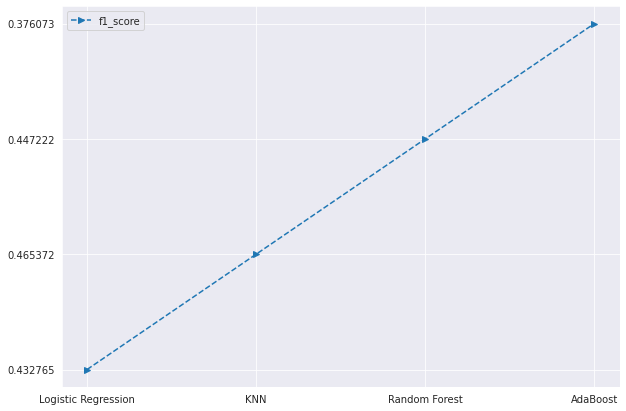

In [30]:
plt.figure(figsize = (10,7))
sns.set_style("darkgrid")
plt.plot(df_metrics['Model'], df_metrics['F1_score'], marker = '>', linestyle='--', label = 'f1_score')
plt.legend(fontsize = 10)
plt.show()
